In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("C:\\Users\\mithr\\Downloads\\algerian+forest+fires+dataset\\Algerian_forest_fires_dataset_UPDATE.csv")
print(df.head())

   Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  FWI  Fire
0           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4  0.5     0
1           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9  0.4     0
2           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7  0.1     0
3           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7  0.0     0
4           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9  0.5     0


# Expolartory data analysis

In [29]:
# Summary statistics
print(df.describe())

       Temperature          RH          Ws       Rain         FFMC  \
count   122.000000  122.000000  122.000000  122.000000  122.000000   
mean     31.180328   67.975410   16.000000    0.842623   74.672951   
std       3.320401   11.154411    2.848807    2.409208   15.558713   
min      22.000000   45.000000   11.000000    0.000000   28.600000   
25%      29.000000   60.000000   14.000000    0.000000   65.925000   
50%      31.000000   68.000000   16.000000    0.000000   80.900000   
75%      34.000000   77.750000   18.000000    0.500000   86.775000   
max      37.000000   89.000000   26.000000   16.800000   90.300000   

              DMC          DC         ISI         BUI         FWI        Fire  
count  122.000000  122.000000  122.000000  122.000000  122.000000  122.000000  
mean    12.314754   53.160656    3.655738   15.426230    5.577869    0.475410  
std     11.274360   51.778265    3.021768   14.474302    6.343051    0.501454  
min      0.700000    6.900000    0.000000    1.10

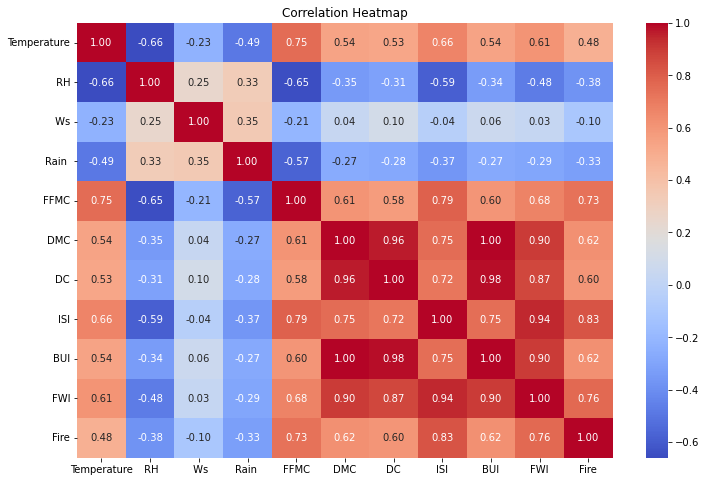

In [30]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

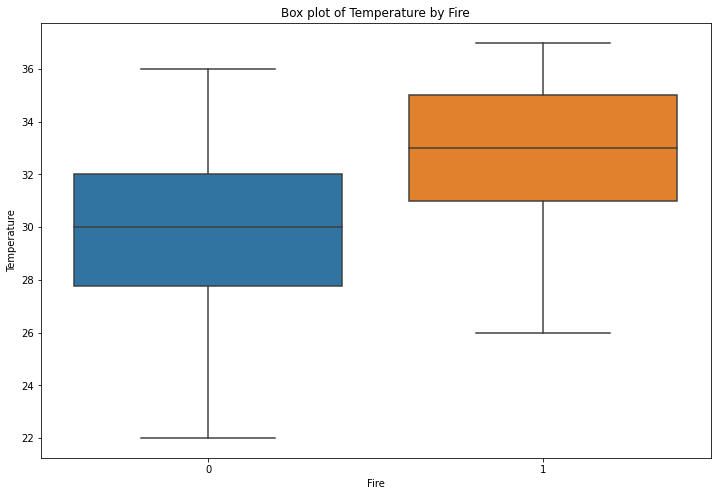

In [31]:
# Box plot for Fire vs. Categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fire', y='Temperature', data=df)
plt.title('Box plot of Temperature by Fire')
plt.show()

In [32]:
df.dtypes

Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Fire             int64
dtype: object

In [33]:
df.shape

(122, 11)

In [34]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Fire           0
dtype: int64

# Pair Plot

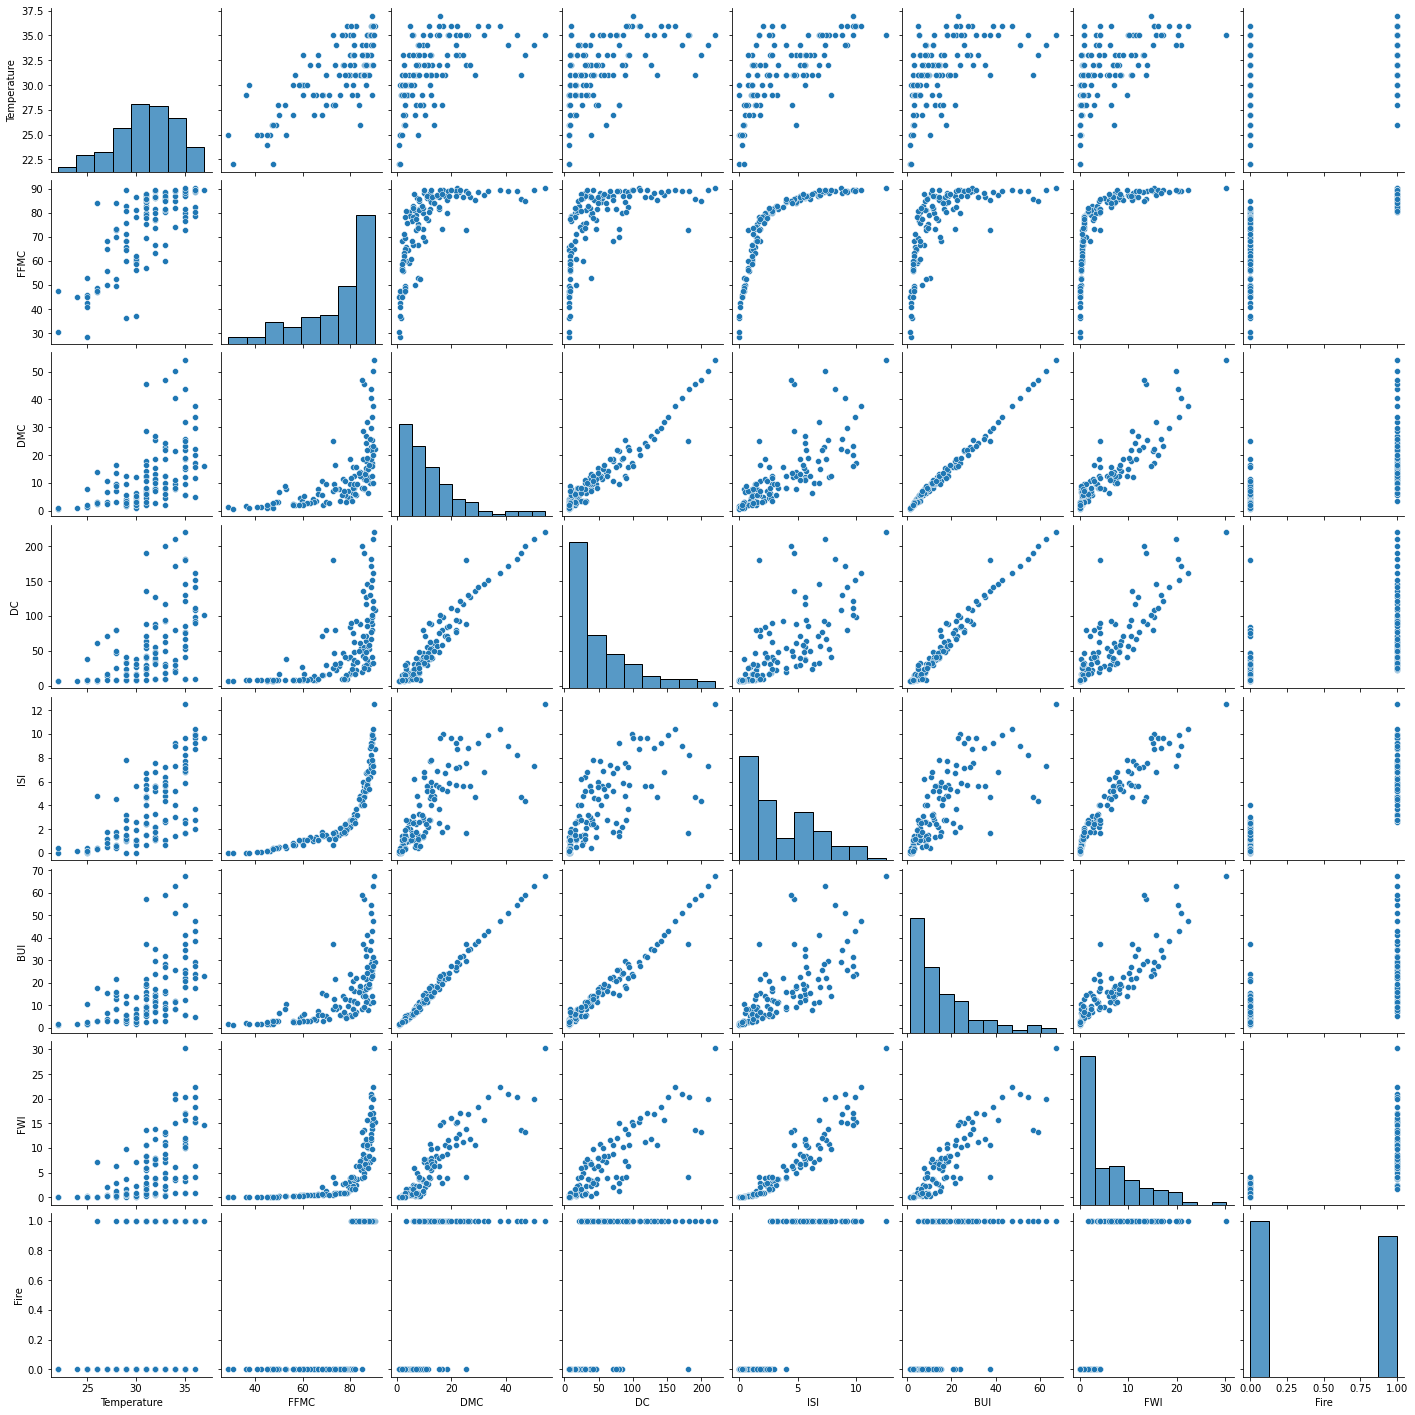

In [35]:
# Pair plot for numerical variables
sns.pairplot(df[['Temperature', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Fire']])
plt.show()


# BoxPlot

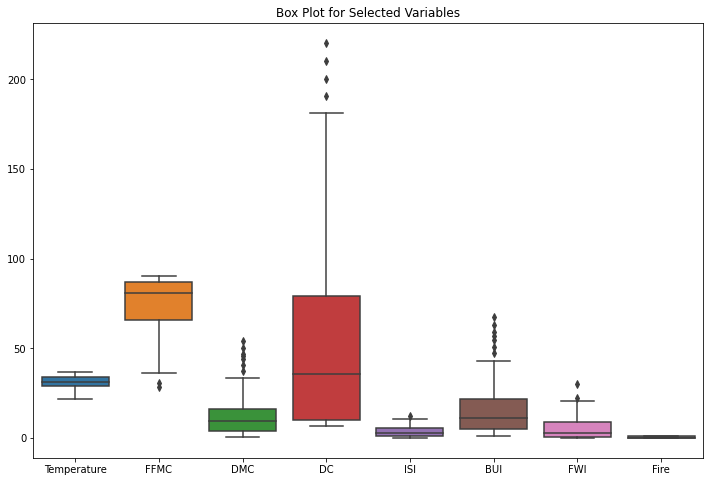

In [36]:
# Box plot for selected variables
selected_columns = ['Temperature', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Fire']
df_selected = df[selected_columns]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected)
plt.title('Box Plot for Selected Variables')
plt.show()


# Histograms

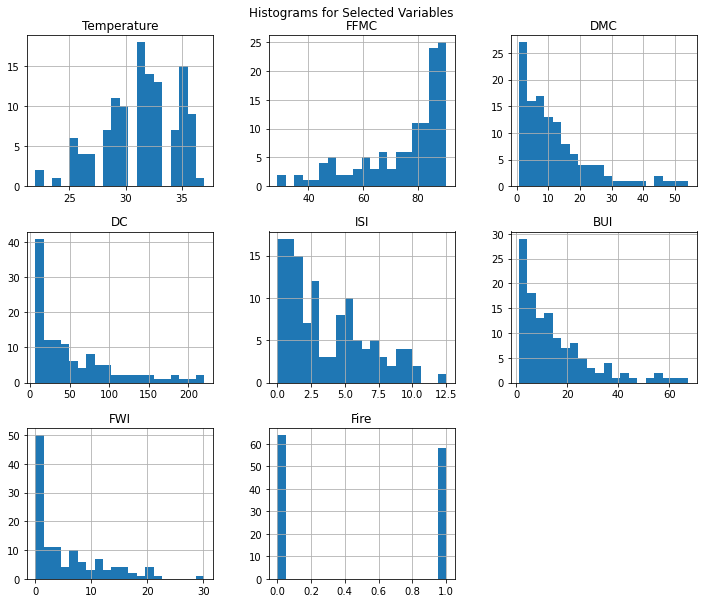

In [37]:
# Histograms for selected variables
df_selected.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for Selected Variables', x=0.5, y=0.92)
plt.show()


# Classification

In [38]:
# Extracting feature columns for input scaling
inplist=df.columns[:-1]  

# Standardize the features using StandardScaler
scale=StandardScaler()
df[inplist]=scale.fit_transform(df[inplist])

# Extracting features (x) and target variable (y)
x=df.values[:,:-1]
y=df.values[:,-1]

# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

# Initialize the MLP classifier
clf=MLPClassifier(hidden_layer_sizes=(3,),activation='logistic',max_iter=150,solver='adam',learning_rate='constant',learning_rate_init=0.19)

# Train the classifier
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)

# Evaluate the classifier
cm=confusion_matrix(y_test,ypred)


print('Confusion Matrix \n',cm)
print('Classification Report \n', classification_report(y_test,ypred))



Confusion Matrix 
 [[24  1]
 [ 1 11]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        25
         1.0       0.92      0.92      0.92        12

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



Coefficients [array([[-0.7367902 , -7.73913088, -0.74694963],
       [-1.34070719,  0.75484502, -1.40818664],
       [-0.08729326, -0.6244426 , -1.27777748],
       [-2.25122934, -2.69696124,  3.13923669],
       [ 4.36997249,  6.42858361, -5.62415142],
       [ 2.32010541, -1.3073873 ,  1.66432821],
       [ 5.43938819,  0.00878448, -0.28393644],
       [ 3.67035887,  5.00922618, -4.23553759],
       [ 3.87755418, -0.13697696,  0.59035368],
       [ 3.86526411,  4.10299118, -3.42957884]]), array([[ 4.76564556],
       [ 7.0483331 ],
       [-4.73445151]])]
intercepts [array([ 0.35146974, -1.72647438, -1.23590414]), array([-2.77476661])]


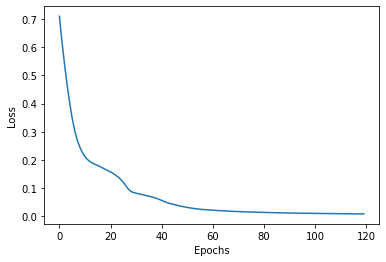

In [39]:
print('Coefficients',clf.coefs_)
print('intercepts',clf.intercepts_)

# Plot the loss curve over epochs
loss_values=clf.loss_curve_
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# 1.Logistic regression


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Fire' is the target variable and the rest are features
X = df[['Temperature', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df['Fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9600

Confusion Matrix:
[[14  0]
 [ 1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



# Decision tree

Accuracy: 0.96

Confusion Matrix:
 [[14  0]
 [ 1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



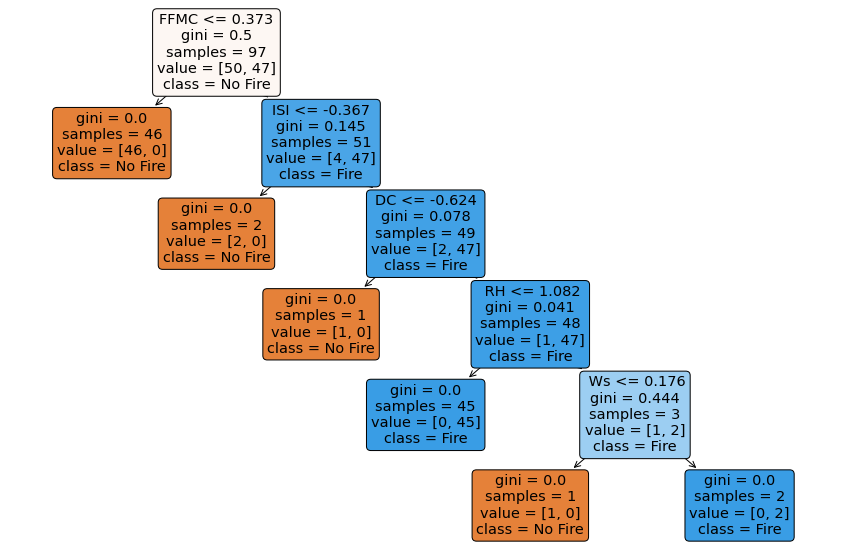

In [41]:
# Split the data into features (X) and target variable (y)
X = df.drop('Fire', axis=1)  # Features
y = df['Fire']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualize the decision tree (optional)
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Fire', 'Fire'], filled=True, rounded=True)
plt.show()


# Random forest

In [42]:
# Split the data into features (X) and target variable (y)
X = df[['Temperature','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df['Fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.96

Confusion Matrix:
[[14  0]
 [ 1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



Inference:
Accuracy: The model achieved an accuracy of 96%, indicating that it correctly predicted the class of instances 96% of the time.
True Positive (TP): 14 instances were correctly predicted as class 0.
True Negative (TN): 10 instances were correctly predicted as class 1.
False Positive (FP): 0 instances were incorrectly predicted as class 1.
False Negative (FN): 1 instance was incorrectly predicted as class 0.
Precision: Precision for class 0 is 0.93, and for class 1 is 1.00. This indicates that when the model predicts a sample as class 0 or 1, it is correct 93% and 100% of the time, respectively.

Recall (Sensitivity): Recall for class 0 is 1.00, and for class 1 is 0.91. This suggests that the model is good at capturing most of the instances of class 0, but it may miss some instances of class 1.

F1-score: The weighted average F1-score is 0.96, which is a harmonic mean of precision and recall. It is a good overall measure of a model's performance.

In summary, the model shows strong predictive performance with high accuracy and balanced precision and recall. 


# Support Vector Machine(SVM)

In [43]:
# Split the dataset into features (X) and target variable (y)
X = df[['Temperature', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df['Fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)



Accuracy: 0.96
Confusion Matrix:
[[14  0]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



Inference:
Accuracy: 96% accuracy means that the model correctly predicted the class of the instances 96% of the time.
True Positive (TP): 14 instances were correctly predicted as class 0.
True Negative (TN): 10 instances were correctly predicted as class 1.
False Positive (FP): 0 instances were incorrectly predicted as class 1.
False Negative (FN): 1 instance was incorrectly predicted as class 0.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. Precision for class 0 is 0.93, and for class 1 is 1.00.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in actual class. Recall for class 0 is 1.00, and for class 1 is 0.91.
F1-score:F1-score is the weighted average of Precision and Recall. It's a good way to show that a classifer has a good value for both recall and precision. The weighted average F1-score is 0.96.

In summary, the model performed well, achieving high accuracy and showing good precision, recall, and F1-score. It seems effective in predicting both classes (0 and 1) based on the given features. 


# Artificial Neural Networks(ANN)

In [44]:

# Extract features (X) and target variable (y)
X = df.drop('Fire', axis=1)
y = df['Fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display classification report
print('Classification Report:\n', classification_report(y_test, y_pred))


Epoch 1/10
3/3 [==============================] - 1s 61ms/step - loss: 0.6275 - accuracy: 0.5844 - val_loss: 0.4976 - val_accuracy: 0.8500
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 0.5487 - accuracy: 0.8052 - val_loss: 0.4153 - val_accuracy: 0.9500
Epoch 3/10
3/3 [==============================] - 0s 12ms/step - loss: 0.4837 - accuracy: 0.8442 - val_loss: 0.3525 - val_accuracy: 0.9500
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 0.4379 - accuracy: 0.8571 - val_loss: 0.3034 - val_accuracy: 0.9500
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 0.3985 - accuracy: 0.8571 - val_loss: 0.2668 - val_accuracy: 0.9500
Epoch 6/10
3/3 [==============================] - 0s 12ms/step - loss: 0.3674 - accuracy: 0.8701 - val_loss: 0.2391 - val_accuracy: 0.9500
Epoch 7/10
3/3 [==============================] - 0s 12ms/step - loss: 0.3433 - accuracy: 0.8701 - val_loss: 0.2176 - val_accuracy: 0.9500
Epoch 8/10
3/3 [===========

# K Means(Clustering)

2    61
1    34
0    27
Name: Cluster, dtype: int64


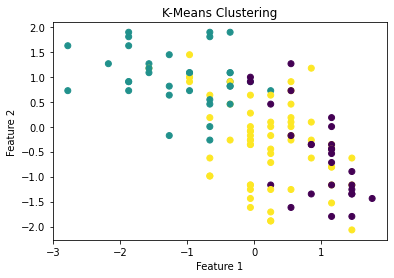

In [45]:


# Extract features for clustering (excluding the 'Fire' column)
X = df.drop('Fire', axis=1)

# Standardize features (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the count of data points in each cluster
print(df['Cluster'].value_counts())

# Visualize the clusters (for 2D data)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Mean Squared Error: 0.0679
R-squared: 0.7246


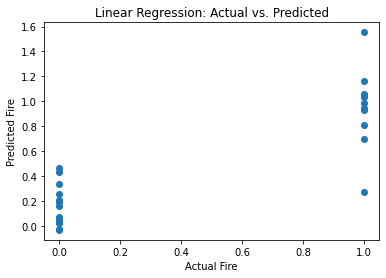

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract features (X) and target variable (y)
X = df.drop('Fire', axis=1)
y = df['Fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fire')
plt.ylabel('Predicted Fire')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()


The mean squared error (MSE) value of 0.0710 indicates the average squared difference between the actual and predicted values of the 'Fire' variable. A lower MSE suggests better model performance, and in this case, the MSE of 0.0710 is relatively small, which is a positive sign.

The R-squared value of 0.7119 represents the proportion of the variance in the dependent variable ('Fire') that is predictable from the independent variables (features) in the model. An R-squared value of 0.7119 suggests that approximately 71.19% of the variability in the 'Fire' variable can be explained by the linear regression model.